<a href="https://colab.research.google.com/github/lalithkumar1512/projects/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA (EXPLORATORY DATA ANALYSIS)

In [24]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

Loading the Data


In [15]:
#Loading Data into Pandas Data frame
df = pd.read_csv(r"t_s1_am_6am.csv")

Inspecting the Data


In [6]:
#Viewing the sample of Data
df.head()

,VV,VH,smap_am,soil_moisture
0,-9.058618,-15.982408,0.284554,0.301
1,-9.511266,-18.085192,0.218601,0.172
2,-10.926619,-19.470199,0.286454,0.485
3,-8.650778,-14.840568,0.407210,0.143
4,-6.633557,-13.470629,0.420252,0.375


Data Types, Summary and Statistics.

In [7]:
#Looking into the Overall view of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30747 entries, 0 to 30746
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VV             30747 non-null  float64
 1   VH             30747 non-null  float64
 2   smap_am        30747 non-null  float64
 3   soil_moisture  30747 non-null  float64
dtypes: float64(4)
memory usage: 961.0 KB


In [50]:
#Dimensions of Dataframe
df.shape


(30747, 4)

In [51]:
#Statistical view of Dataframe
df.describe()

,VV,VH,smap_am,soil_moisture
count,30747.000000,30747.000000,30747.000000,30747.000000
mean,-9.195999,-16.417307,0.147262,0.412488
std,2.943375,3.413569,0.121603,17.746967
min,-26.670000,-35.349515,0.000000,0.000000
25%,-10.845618,-18.014890,0.071006,0.078000
50%,-9.104179,-15.783631,0.125384,0.174000
75%,-7.631939,-14.171636,0.202437,0.279000
max,5.057968,-4.289361,0.674961,1396.570000


Dealing with missing values

In [8]:
missing_values = df.isnull() # getting the null valued rows
print(missing_values)
print(df.isnull().sum())


          VV     VH  smap_am  soil_moisture
0      False  False    False          False
1      False  False    False          False
2      False  False    False          False
3      False  False    False          False
4      False  False    False          False
...      ...    ...      ...            ...
30742  False  False    False          False
30743  False  False    False          False
30744  False  False    False          False
30745  False  False    False          False
30746  False  False    False          False

[30747 rows x 4 columns]
VV               0
VH               0
smap_am          0
soil_moisture    0
dtype: int64


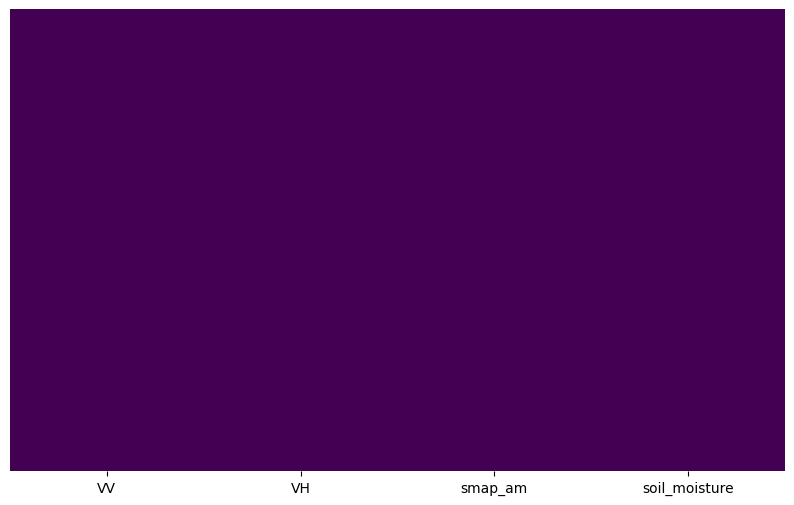

In [16]:
# for i in range(1000):
#   df.at[i, 'VV'] = None
# print(df)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.show()

Dependent variable: soil_moisture, Independent variables: VV, VH, smap_am


In [32]:
df.corr()  #Correlation between the variables

,VV,VH,smap_am,soil_moisture
VV,1.000000,0.888137,0.146417,-0.000257
VH,0.888137,1.000000,0.282823,0.005085
smap_am,0.146417,0.282823,1.000000,0.005980
soil_moisture,-0.000257,0.005085,0.005980,1.000000


Visualizing the Data --> Univariate analysis


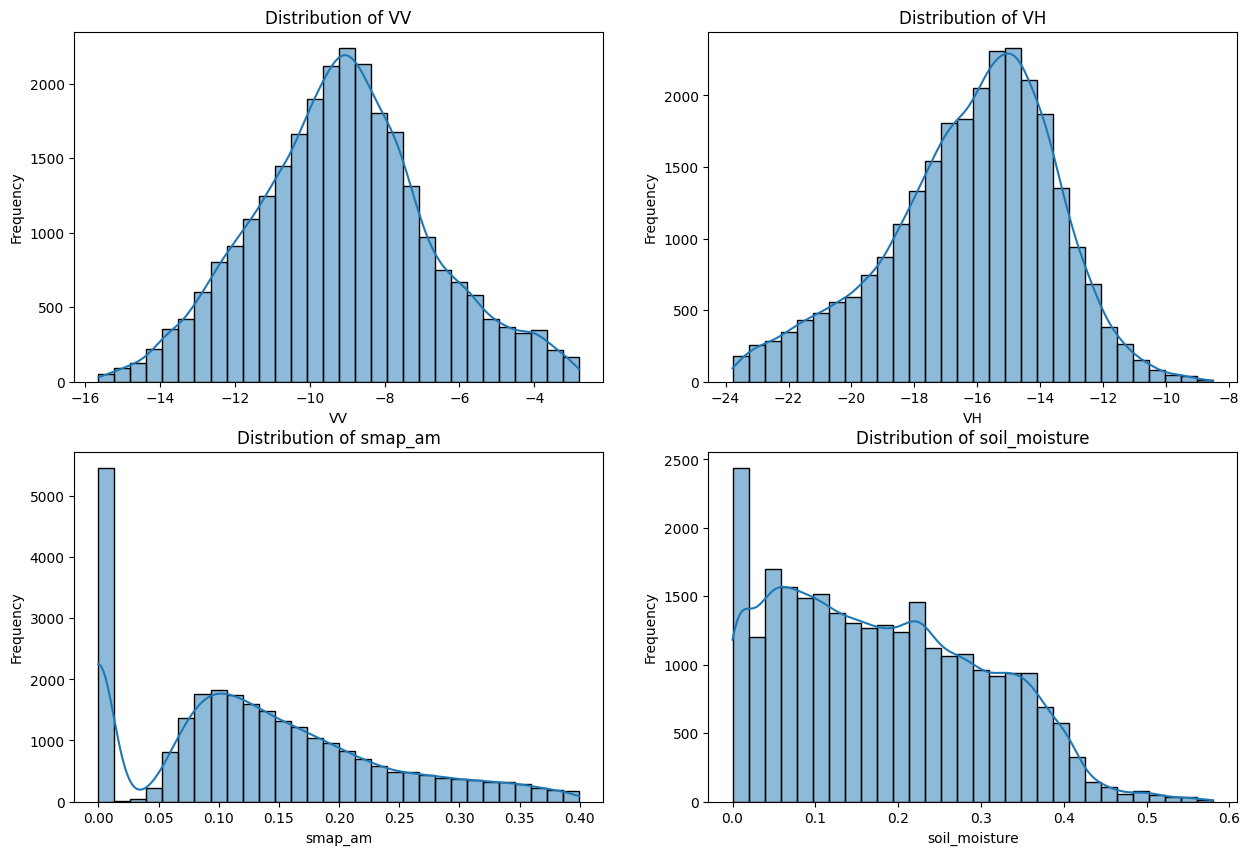

[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.0069999999999999, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.0139999999999999, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.0279999999999999, 0.0289999999999999, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.0409999999999999, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.0559999999999999, 0.057, 0.0579999999999999, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.0819999999999999, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.0969999999999999, 0.098, 0.099, 0.1, 0.1009999999999999, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0.1119999999999999, 0.113, 0.114, 0.115, 0.1159999999999999, 0.1169999999999999, 0.118, 0.119, 0.12

In [98]:
columns = df.columns[:4]  # Select the first 4 columns for this example
num_columns = len(columns)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust the figure size as needed

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over the columns and the corresponding subplot axis
for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, bins=30, ax=axs[i])  # Plot histogram on the specified axis
    axs[i].set_title(f'Distribution of {column}')  # Set the title for the subplot
    axs[i].set_xlabel(column)  # Label the x-axis with the name of the feature
    axs[i].set_ylabel('Frequency')  # The y-axis shows the frequency of the observations

# Display the plots
plt.show()

print(sorted(df['soil_moisture'].value_counts().to_dict()))

Visualizing the Data --> Bivariate analysis

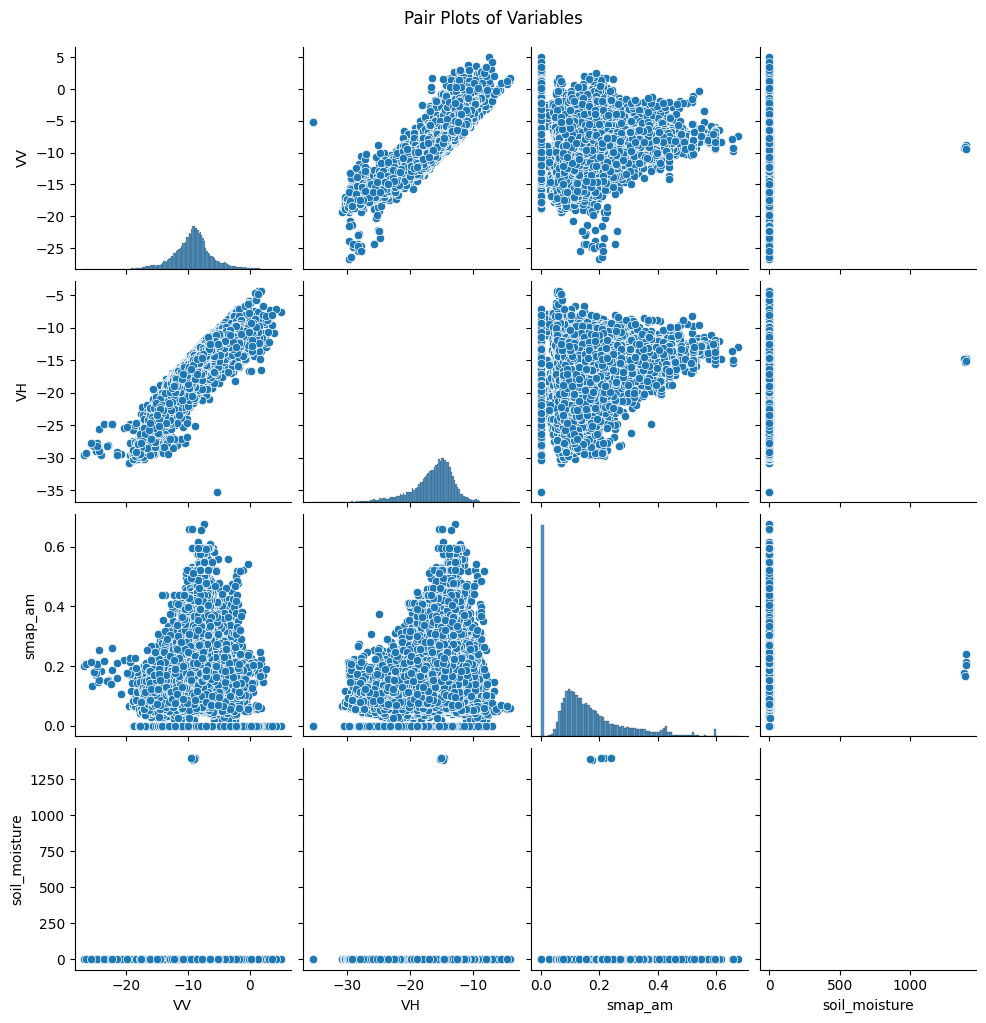

In [21]:
# Scatter plots
sns.pairplot(df)
plt.suptitle('Pair Plots of Variables', y=1.02)
plt.show()


Corelation of data


Correlation Matrix:
                     VV        VH   smap_am  soil_moisture
VV             1.000000  0.888137  0.146417      -0.000257
VH             0.888137  1.000000  0.282823       0.005085
smap_am        0.146417  0.282823  1.000000       0.005980
soil_moisture -0.000257  0.005085  0.005980       1.000000


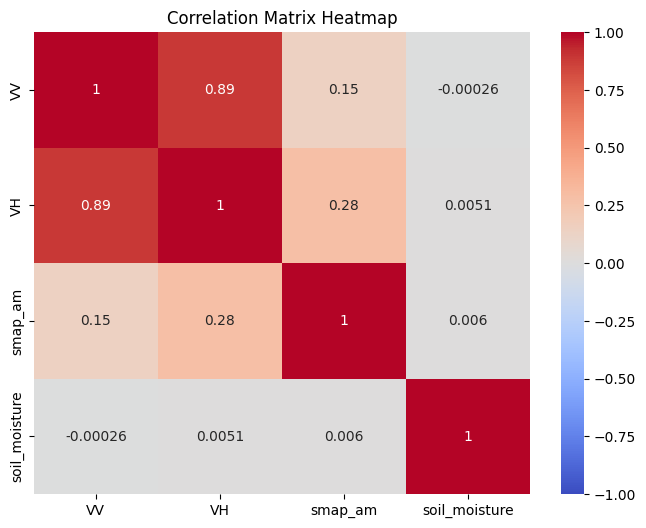

In [22]:
# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


Handling Duplicate Rows

In [18]:
duplicate_rows = df[df.duplicated()] #checking for duplicate rows
print(duplicate_rows)

              VV         VH   smap_am  soil_moisture
9463   -6.728263 -13.377953  0.409879          0.000
10316  -8.322000 -15.026160  0.000000          0.002
10610  -8.794185 -15.440610  0.304971          0.000
10712  -8.355611 -13.373356  0.299018          0.000
19230  -7.964323 -14.596812  0.467987          0.000
19372  -7.969918 -12.929211  0.432479          0.000
19648 -10.606812 -16.985178  0.000000          0.000
20755  -8.199110 -13.118798  0.438085          0.000
21546  -7.888458 -13.556169  0.347211          0.007
21720  -8.141978 -14.527202  0.334058          0.093
24831  -7.919616 -13.391875  0.284896          0.009
25420  -7.323763 -14.539195  0.396123          0.004
28833  -9.410892 -14.812596  0.224703          0.021


In [19]:
df.drop_duplicates(inplace=True) #dropping duplicate rows

In [20]:
df.describe()

,VV,VH,smap_am,soil_moisture
count,30734.000000,30734.000000,30734.000000,30734.000000
mean,-9.196386,-16.418210,0.147196,0.412658
std,2.943877,3.413933,0.121549,17.750718
min,-26.670000,-35.349515,0.000000,0.000000
25%,-10.846726,-18.015636,0.070999,0.078000
50%,-9.105106,-15.784743,0.125320,0.174000
75%,-7.631884,-14.172247,0.202307,0.279000
max,5.057968,-4.289361,0.674961,1396.570000


Outlier Removal


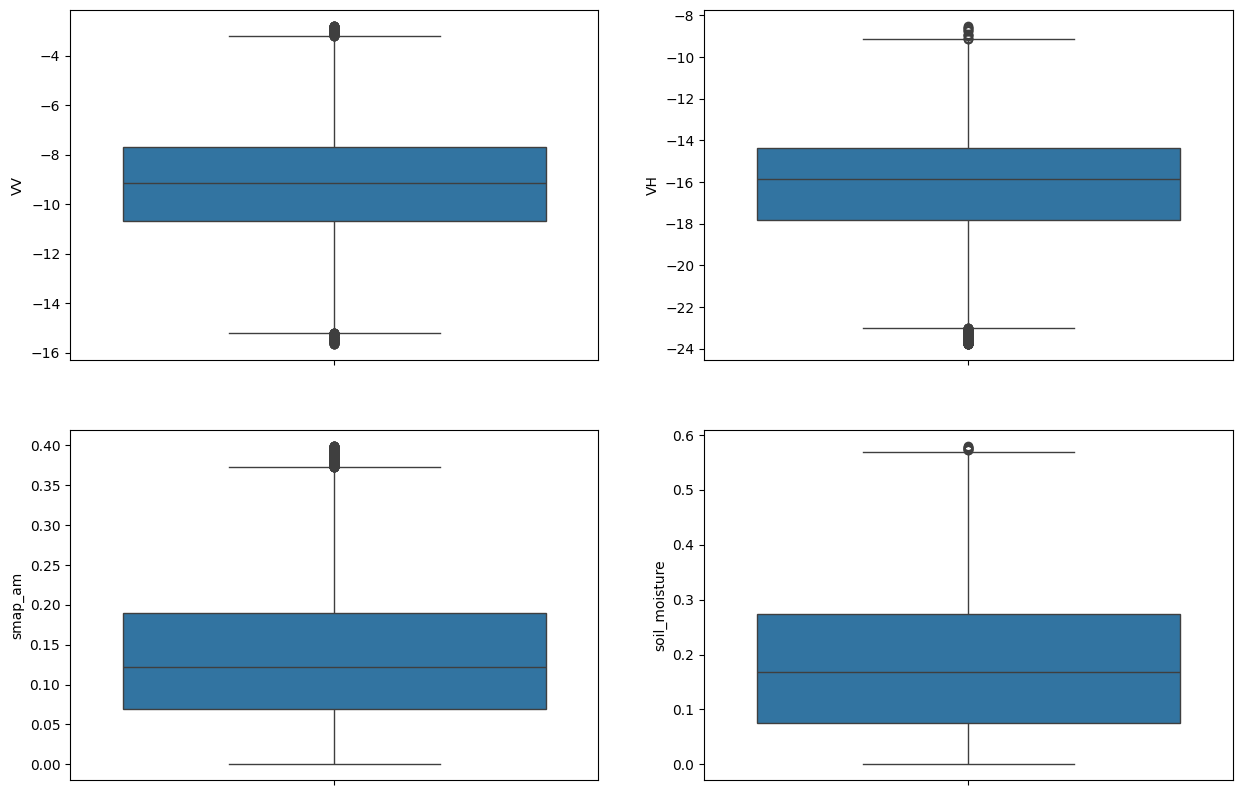

In [99]:
columns = data.columns[:4]  # Select the first 4 columns for this example
num_columns = len(columns)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust the figure size as needed

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over the columns and the corresponding subplot axis
for i, column in enumerate(columns):
    sns.boxplot(data[column],ax=axs[i])  # Plot histogram on the specified axis

# Display the plots
plt.show()

In [51]:
Q1 = df.quantile(0.25)
# print(Q1)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use any(axis=1) to remove a row if any column has an outlier
data = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

VV              -10.846726
VH              -18.015636
smap_am           0.070999
soil_moisture     0.078000
Name: 0.25, dtype: float64


In [62]:
data.describe()

,VV,VH,smap_am,soil_moisture
count,26980.000000,26980.000000,26980.000000,26980.000000
mean,-9.130619,-16.223686,0.132155,0.180318
std,2.359380,2.676589,0.099210,0.122632
min,-15.650000,-23.779995,0.000000,0.000000
25%,-10.694954,-17.815502,0.068727,0.076000
50%,-9.139886,-15.863170,0.121531,0.168000
75%,-7.695933,-14.345561,0.190312,0.274000
max,-2.811286,-8.508019,0.399252,0.580000


PCA (Principal component Analysis)

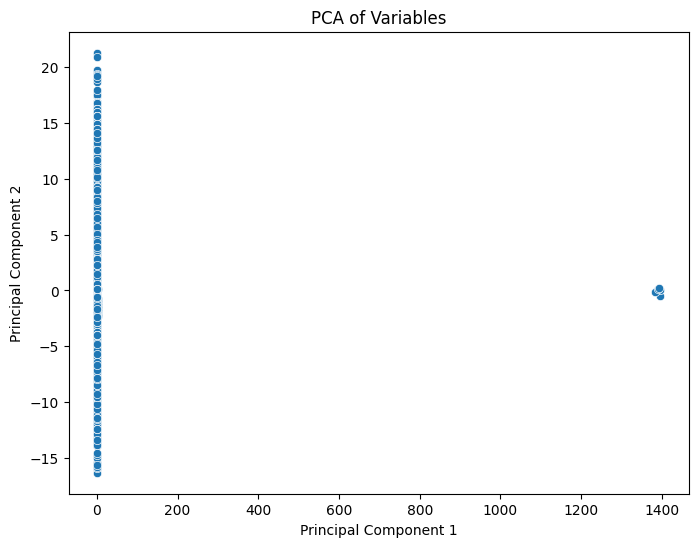

Explained Variance by Principal Components: [0.93937283 0.05727514]


In [56]:
# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
principal_components = pca.fit_transform(df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
plt.title('PCA of Variables')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Principal Components:", explained_variance)


Data Preprocessing and train-test split


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assiging Independent as X and dependent as Y
X = data[['VV', 'VH', 'smap_am']]
y = data['soil_moisture']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Initial split into training and test set in 80:20 ratio
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Linear Regression


Mean Squared Error: 0.014842389592078748
R^2 Score: 0.0027787255915281417


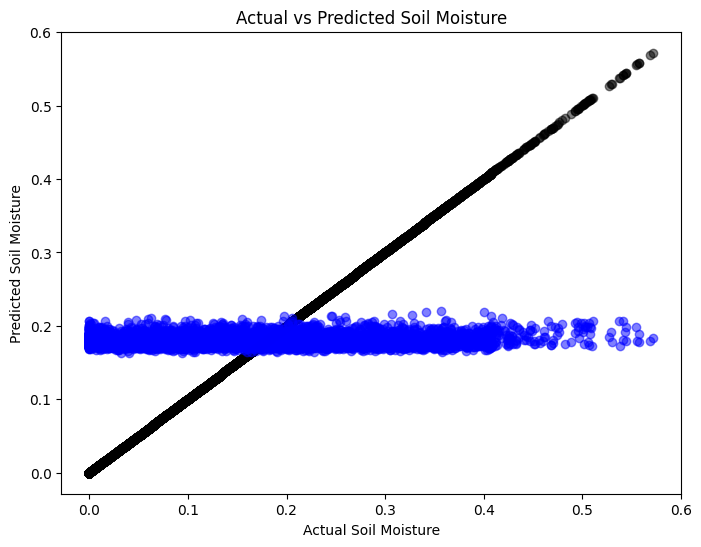

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, alpha=0.5, color='black')

# Plot predicted values in red
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture")
plt.show()


Random Forest Regression


Random Forest Regression:
Mean Squared Error: 0.01531645429819894
R^2 Score: -0.029072440115748277


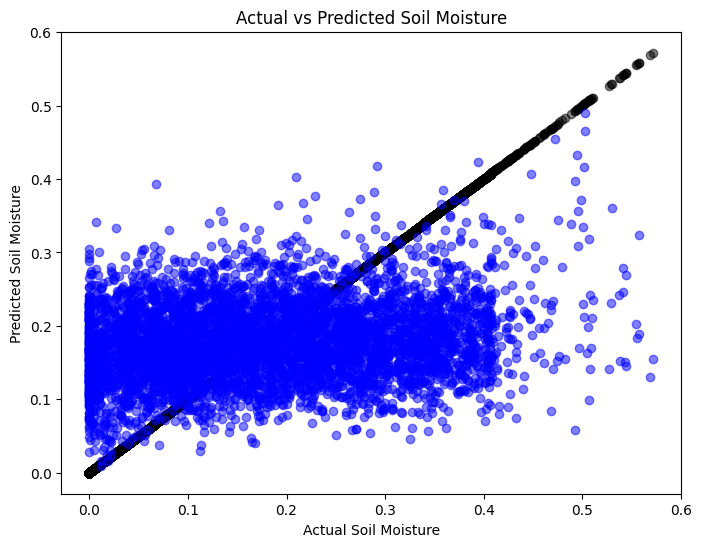

In [82]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")
plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, alpha=0.5, color='black')

# Plot predicted values in red
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture")
plt.show()


Gradient Boosting Regressor

Gradient Boosting Regression:
Mean Squared Error: 0.014222700530404116
R^2 Score: 0.04441401025956904


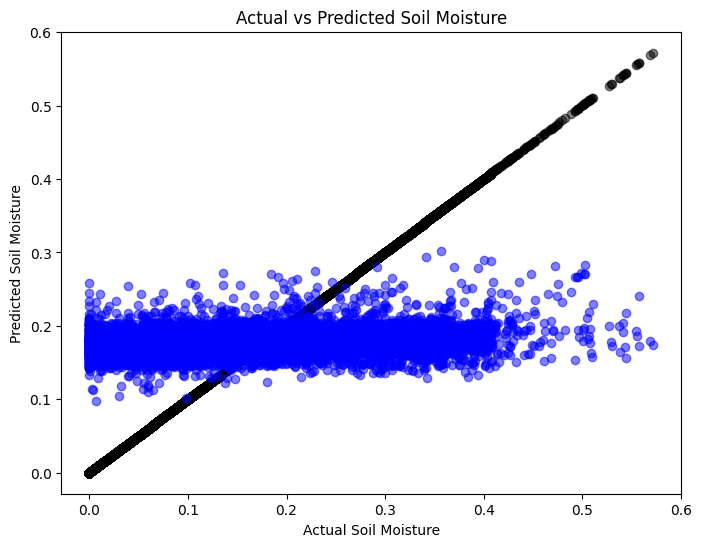

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model
gradient_boosting.fit(X_train, y_train)

# Predict on the test set
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred)

print("Gradient Boosting Regression:")
print(f"Mean Squared Error: {mse_gb}")
print(f"R^2 Score: {r2_gb}")
plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, alpha=0.5, color='black')

# Plot predicted values in red
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture")
plt.show()


MLP Regressor (DL)



Epoch 1/100
540/540 [==============================] - 4s 5ms/step - loss: 0.0164 - val_loss: 0.0151
Epoch 2/100
540/540 [==============================] - 2s 3ms/step - loss: 0.0151 - val_loss: 0.0149
Epoch 3/100
540/540 [==============================] - 1s 2ms/step - loss: 0.0148 - val_loss: 0.0150
Epoch 5/100
540/540 [==============================] - 1s 2ms/step - loss: 0.0148 - val_loss: 0.0149
Epoch 6/100
540/540 [==============================] - 1s 2ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 7/100
540/540 [==============================] - 1s 2ms/step - loss: 0.0147 - val_loss: 0.0149
Epoch 8/100
540/540 [==============================] - 2s 3ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 9/100
540/540 [==============================] - 2s 3ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 10/100
540/540 [==============================] - 1s 2ms/step - loss: 0.0146 - val_loss: 0.0146
Epoch 11/100
540/540 [==============================] - 1s 2ms/step - loss: 0.0145 - val_l

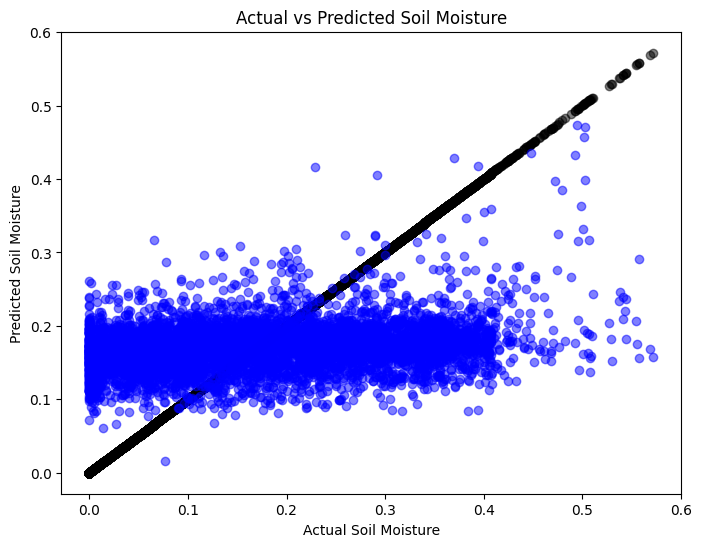

In [88]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
mse_dl = mean_squared_error(y_test, y_pred)
r2_dl = r2_score(y_test, y_pred)

print("Deep Learning MLP Regression:")
print(f"Mean Squared Error: {mse_dl}")
print(f"R^2 Score: {r2_dl}")
plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, alpha=0.5, color='black')

# Plot predicted values in red
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture")
plt.show()

LSTM Regression

Epoch 1/50
540/540 [==============================] - 12s 10ms/step - loss: 0.0162 - val_loss: 0.0149
Epoch 2/50
540/540 [==============================] - 6s 10ms/step - loss: 0.0148 - val_loss: 0.0150
Epoch 3/50
540/540 [==============================] - 5s 9ms/step - loss: 0.0147 - val_loss: 0.0148
Epoch 4/50
540/540 [==============================] - 4s 8ms/step - loss: 0.0147 - val_loss: 0.0148
Epoch 5/50
540/540 [==============================] - 5s 8ms/step - loss: 0.0147 - val_loss: 0.0149
Epoch 6/50
540/540 [==============================] - 8s 14ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 7/50
540/540 [==============================] - 5s 10ms/step - loss: 0.0146 - val_loss: 0.0149
Epoch 8/50
540/540 [==============================] - 5s 8ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 9/50
540/540 [==============================] - 5s 9ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 10/50
540/540 [==============================] - 4s 8ms/step - loss: 0.0146 - val_loss: 0

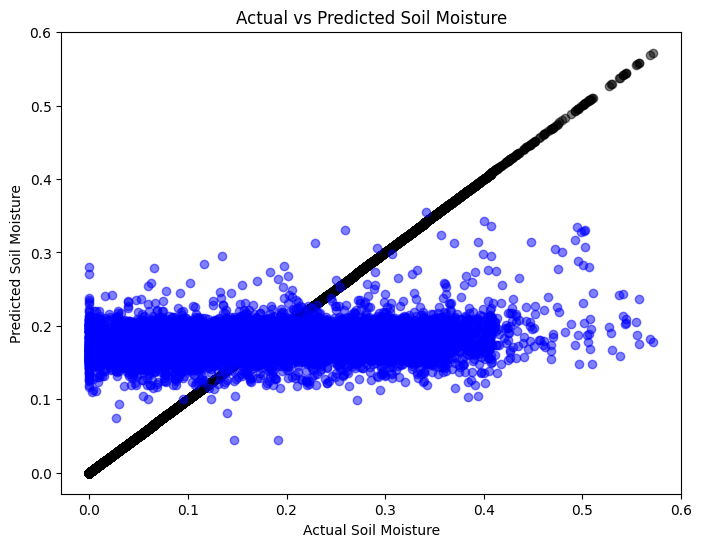

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is stored in a DataFrame called df
# Split the data into features (X) and target variable (y)
X = data[['VV', 'VH', 'smap_am']]
y = data['soil_moisture']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Create a Sequential model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))

# Add Dense output layer
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LSTM Regression:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.figure(figsize=(8, 6))
# Plot actual values in blue
plt.scatter(y_test, y_test, alpha=0.5, color='black')

# Plot predicted values in red
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture")
plt.show()
